In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pit_data = pd.read_csv(r"C:\Users\Cashapona\Documents\GWU\Spring 2025\Machine Learning 1\Group 1\Pit_Stop7.csv")

In [5]:
pit_data.head()

,Year,Team,Driver,LapNumber,Stint,Compound,TyreLife,StintLengthSoFar,LapTime(s),LapTimeDelta,...,PositionDelta,TrackTemp,AirTemp,Humidity,Rain,IsSafetyCarLap,IsVSCLap,IsNeutralizedLap,CompoundSimplified,TireEra
0,2018,McLaren,ALO,1,1,HYPERSOFT,5,1,88.656,0.000,...,0,33.4,25.6,51.7,0,0,0,0,SOFT,PreUnified
1,2018,McLaren,ALO,2,1,HYPERSOFT,6,2,79.987,-8.669,...,0,33.7,25.6,51.4,0,0,0,0,SOFT,PreUnified
2,2018,McLaren,ALO,3,1,HYPERSOFT,7,3,79.790,-0.197,...,0,33.8,25.8,50.6,1,0,0,0,SOFT,PreUnified
3,2018,McLaren,ALO,4,1,HYPERSOFT,8,4,79.456,-0.334,...,0,33.9,26.0,50.7,1,0,0,0,SOFT,PreUnified
4,2018,McLaren,ALO,5,1,HYPERSOFT,9,5,79.135,-0.321,...,0,33.9,26.1,50.0,1,0,0,0,SOFT,PreUnified


In [6]:
# Check for null values
pit_data.isnull().sum()

Year                     0
Team                     0
Driver                   0
LapNumber                0
Stint                    0
Compound                 0
TyreLife                 0
StintLengthSoFar         0
LapTime(s)               0
LapTimeDelta             0
AvgLapTimeInStint        0
CumulativeTimeInStint    0
StintDegradationSlope    0
Position                 0
PositionDelta            0
TrackTemp                0
AirTemp                  0
Humidity                 0
Rain                     0
IsSafetyCarLap           0
IsVSCLap                 0
IsNeutralizedLap         0
CompoundSimplified       0
TireEra                  0
dtype: int64

In [7]:
# Summary statistics for numerical columns
pit_data.describe()

,Year,LapNumber,Stint,TyreLife,StintLengthSoFar,LapTime(s),LapTimeDelta,AvgLapTimeInStint,CumulativeTimeInStint,StintDegradationSlope,Position,PositionDelta,TrackTemp,AirTemp,Humidity,Rain,IsSafetyCarLap,IsVSCLap,IsNeutralizedLap
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,2021.142514,37.790879,1.901890,23.463846,22.504350,86.186753,-0.083281,86.688371,1801.307154,-0.031947,5.597660,0.005701,35.535854,23.324662,57.043054,0.262526,0.045305,0.002100,0.047405
std,2.153984,22.055202,0.788368,16.939948,17.203876,109.953309,5.242223,109.535971,1337.592650,1.078270,4.103093,0.382264,5.571896,2.082263,9.973245,0.440073,0.208002,0.045787,0.212535
min,2018.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-46.287000,75.339273,0.000000,-2.672746,1.000000,-7.000000,26.400000,20.300000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,19.000000,1.000000,10.000000,9.000000,77.141000,-0.429000,78.523079,709.562000,-0.157009,3.000000,0.000000,30.800000,21.800000,50.800000,0.000000,0.000000,0.000000,0.000000
50%,2022.000000,37.000000,2.000000,20.000000,18.000000,78.353000,-0.039000,79.350697,1530.686000,-0.030415,5.000000,0.000000,34.300000,22.600000,57.900000,0.000000,0.000000,0.000000,0.000000
75%,2023.000000,56.000000,2.000000,33.000000,33.000000,79.938000,0.257000,80.745426,2564.195000,0.039934,8.000000,0.000000,39.900000,25.300000,62.300000,1.000000,0.000000,0.000000,0.000000
max,2024.000000,78.000000,6.000000,78.000000,77.000000,2483.804000,42.066000,2483.804000,5972.813000,13.637800,20.000000,3.000000,49.300000,27.600000,85.000000,1.000000,1.000000,1.000000,1.000000


# EXPLORATORY DATA ANALYSIS

In [35]:
!pip install fastf1

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 1.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.6 MB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 1.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [38]:
# Analyzing Max Verstappen's and Charles Leclerc's individual data from Monaco to evaluate their distinct driving styles and variations in pit stop strategies
def plot_driver_throttle_brake(driver_abbr, team_name=None):
    years = [2018, 2019, 2021, 2022, 2023,2024]
    telemetry_by_year = {}

    for year in years:
        try:
            session = fastf1.get_session(year, 'Monaco', 'R')
            session.load()
            lap = session.laps.pick_driver(driver_abbr).pick_fastest()
            tel = lap.get_telemetry().add_distance()
            telemetry_by_year[year] = tel
            print(f"Loaded {driver_abbr} {year}")
        except Exception as e:
            print(f"Skipped {driver_abbr} {year} - {e}")

    title_driver = driver_abbr if not team_name else f"{driver_abbr} – {team_name}"

    # Throttle Plot
    plt.figure(figsize=(14, 5))
    for year, tel in telemetry_by_year.items():
        plt.plot(tel['Distance'], tel['Throttle'], label=f'{year}')
    plt.title(f"Throttle Evolution – {title_driver} at Monaco (2018–2024)")
    plt.xlabel("Distance (m)")
    plt.ylabel("Throttle (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Brake Plot
    plt.figure(figsize=(14, 5))
    for year, tel in telemetry_by_year.items():
        plt.plot(tel['Distance'], tel['Brake'] * 100, label=f'{year}')
    plt.title(f"Brake Evolution – {title_driver} at Monaco (2018–2024)")
    plt.xlabel("Distance (m)")
    plt.ylabel("Brake (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Skipped VER 2018 - name 'fastf1' is not defined
Skipped VER 2019 - name 'fastf1' is not defined
Skipped VER 2021 - name 'fastf1' is not defined
Skipped VER 2022 - name 'fastf1' is not defined
Skipped VER 2023 - name 'fastf1' is not defined
Skipped VER 2024 - name 'fastf1' is not defined


C:\Users\Cashapona\AppData\Local\Temp\ipykernel_11184\3328730288.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


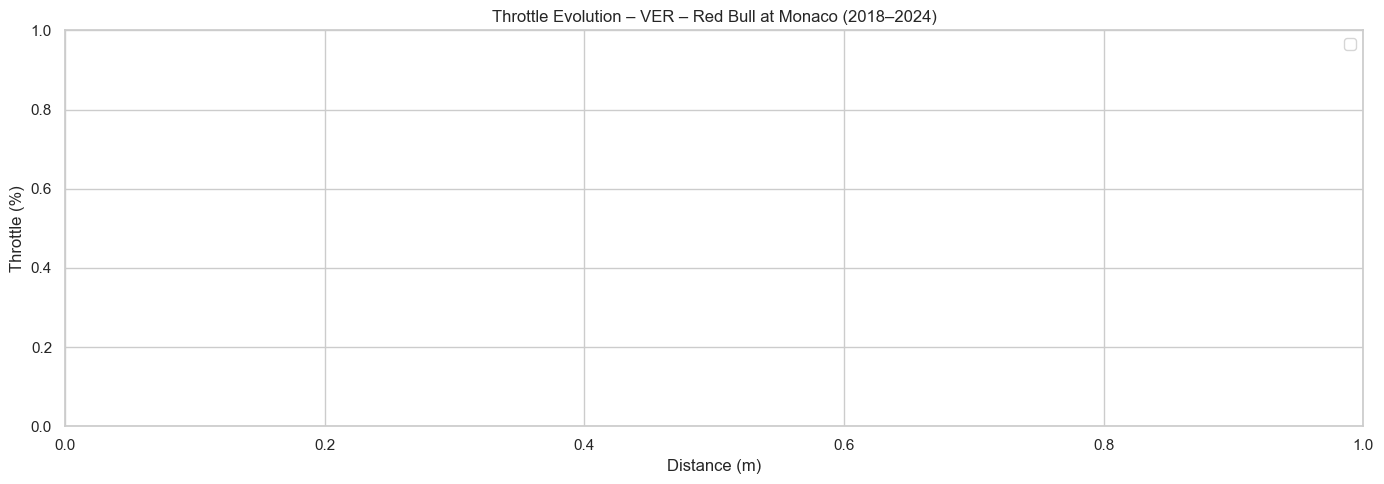

C:\Users\Cashapona\AppData\Local\Temp\ipykernel_11184\3328730288.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


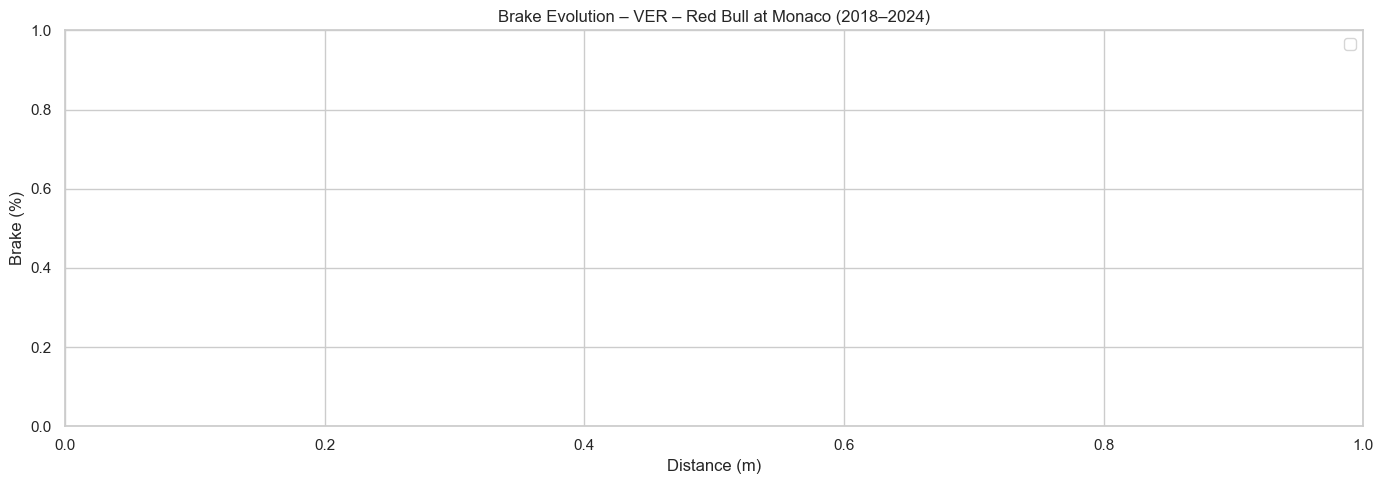

In [39]:
plot_driver_throttle_brake("VER", "Red Bull") #Loaded directly from Fastf1 library API

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           

Loaded LEC 2018


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.087000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '77', '33', '10', '55', '26', '23', '3', '8', '4', '11', '27', '20', '63', '18', '7', '88', '99', '16']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['44', '5', '77', '33', '10', '55', '26', '23', '3', '8', '4', '11', '27', '20', '63', '18', '7', '88', '99', '16']
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: Future

Loaded LEC 2019


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.058000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '55', '4', '11', '5', '10', '44', '18', '31', '99', '7', '3', '14', '63', '6', '22', '9', '47', '77', '16']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['33', '55', '4', '11', '5', '10', '44', '18', '31', '99', '7', '3', '14', '63', '6', '22', '9', '47', '77', '16']
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWa

Skipped LEC 2021 - 'NoneType' object has no attribute 'get_telemetry'


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings

Loaded LEC 2022


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warn

Loaded LEC 2023


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnin

Loaded LEC 2024


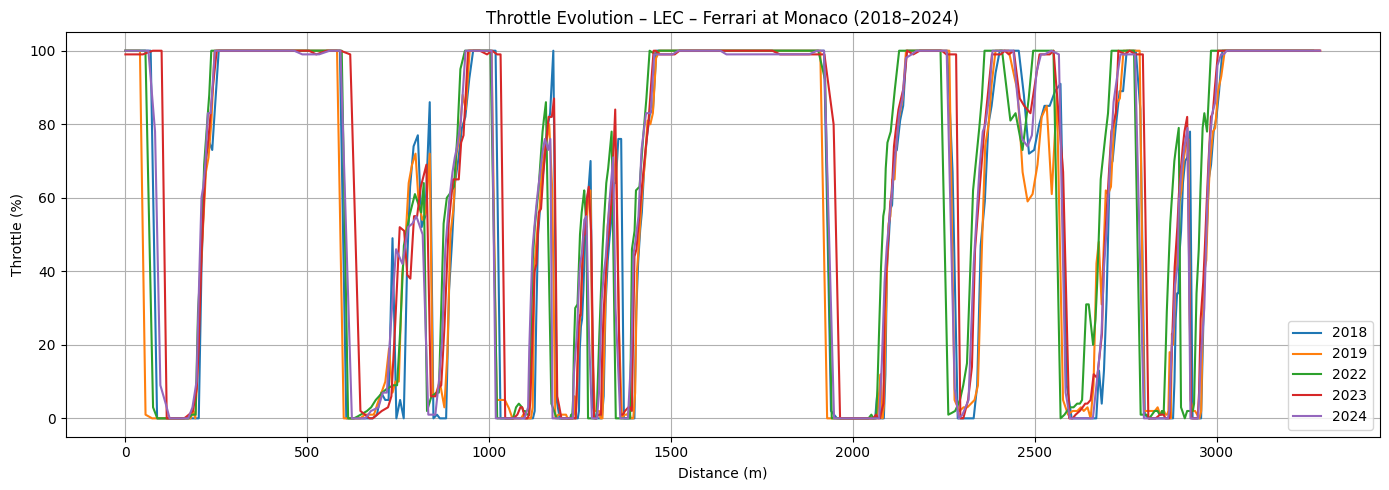

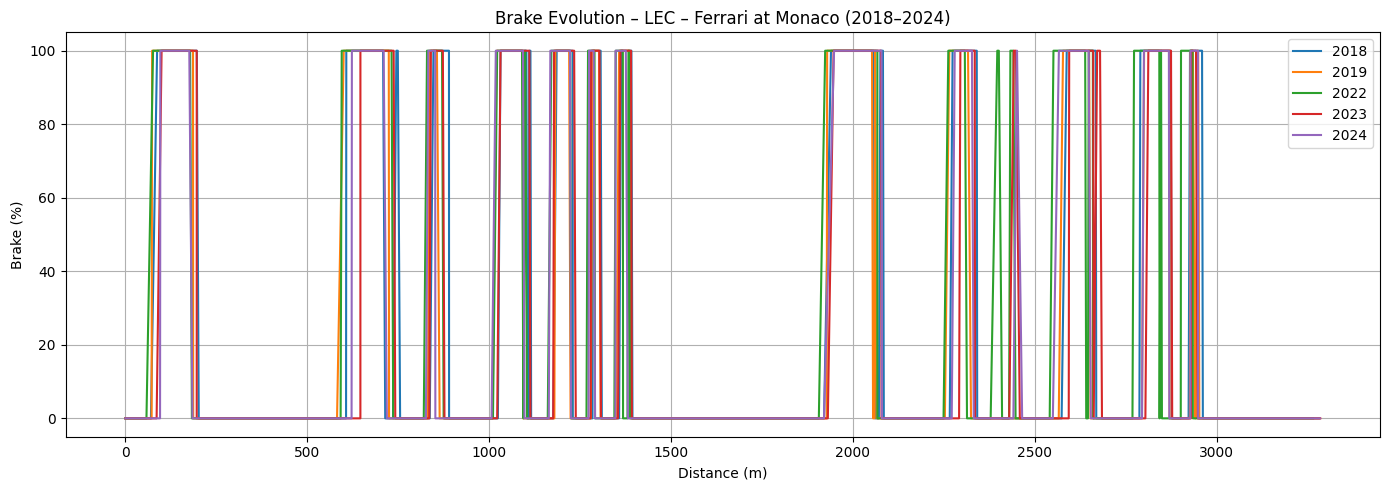

In [ ]:
plot_driver_throttle_brake("LEC", "Ferrari") #2021 Charles did not race due to gearbox problem with his car.

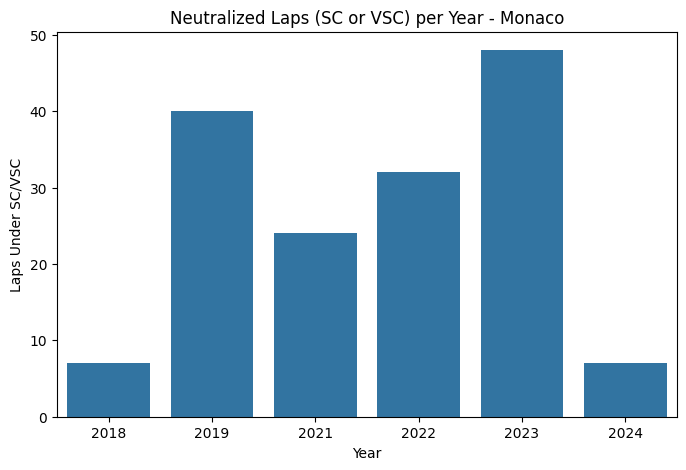

In [10]:
import seaborn as sns
sc_summary = pit_data.groupby(['Year'])['IsNeutralizedLap'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=sc_summary, x='Year', y='IsNeutralizedLap')
plt.title('Neutralized Laps (SC or VSC) per Year - Monaco')
plt.ylabel('Laps Under SC/VSC')
plt.show()

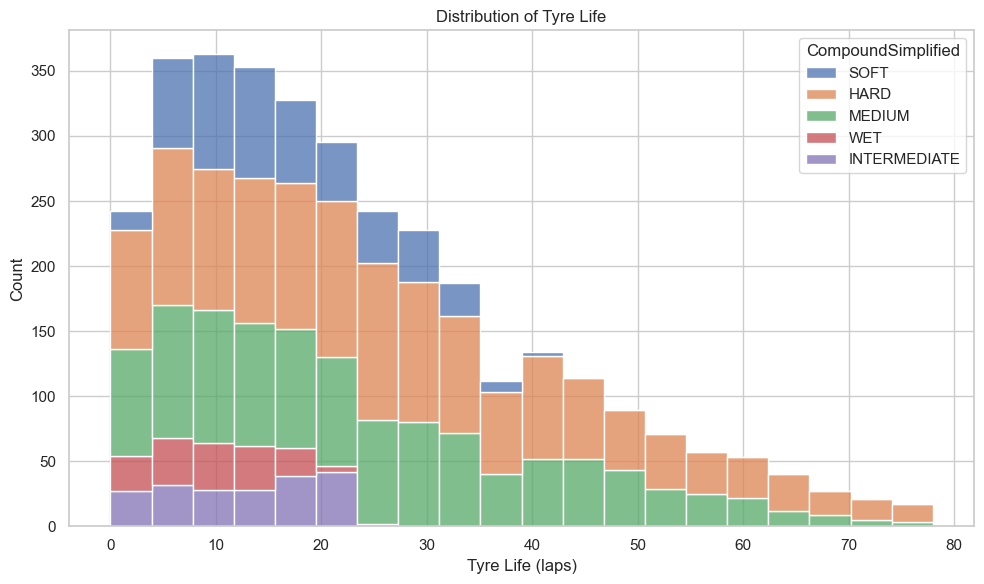

In [11]:
# Set plot style
sns.set(style="whitegrid")

# Tyre Life Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=pit_data, x='TyreLife', bins=20, hue='CompoundSimplified', multiple="stack")
plt.title('Distribution of Tyre Life')
plt.xlabel('Tyre Life (laps)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

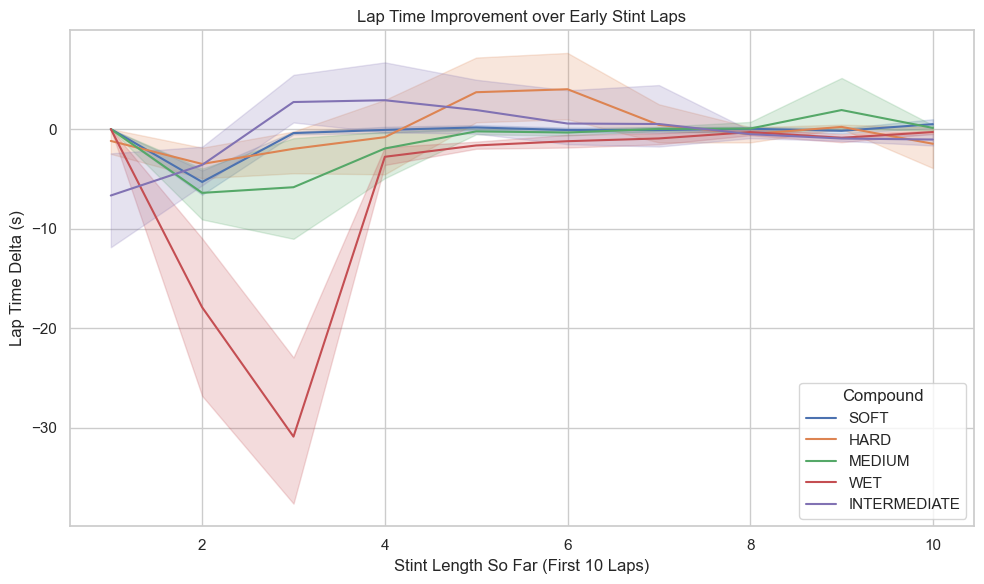

In [12]:
# Lap Time Improvement Over Early Stint Laps
plt.figure(figsize=(10,6))

# Focus only on first 10 laps of each stint
early_stint_df = pit_data[pit_data['StintLengthSoFar'] <= 10]

# Line plot
sns.lineplot(data=early_stint_df, x='StintLengthSoFar', y='LapTimeDelta', hue='CompoundSimplified')

plt.title('Lap Time Improvement over Early Stint Laps')
plt.xlabel('Stint Length So Far (First 10 Laps)')
plt.ylabel('Lap Time Delta (s)')
plt.legend(title='Compound')
plt.tight_layout()
plt.show()

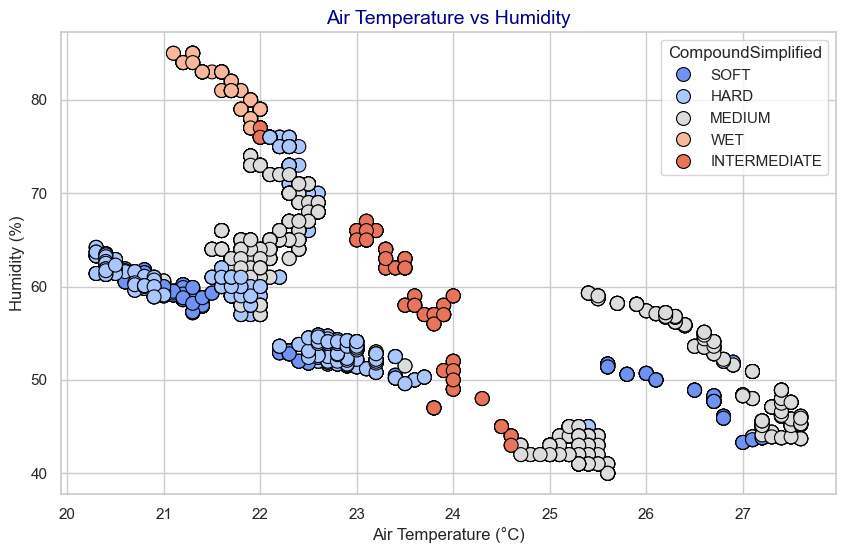

In [13]:
# Air Temperature vs Humidity

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pit_data, x="AirTemp", y="Humidity", hue="CompoundSimplified", palette='coolwarm', s=100, edgecolor='black')
plt.title("Air Temperature vs Humidity", fontsize=14, color='darkblue')
plt.xlabel("Air Temperature (°C)", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.show()

# EXPERIMENT SECTION

### How can we predict the optimal lap for a driver to pit during the Monaco Grand Prix based on external features and race conditions?

In [14]:
# Group by (Year, Driver, Stint) and aggregate features
pit_data1 = pit_data.groupby(["Year", "Driver", "Stint"]).agg({
    "LapNumber": ["min", "max", "count"],
    "LapTime(s)": ["mean", "std", "min", "max"],
    "LapTimeDelta": ["mean", "std"],
    "AvgLapTimeInStint": "mean",
    "CumulativeTimeInStint": "max",
    "StintLengthSoFar": "max",
    "StintDegradationSlope": "mean",
    "TyreLife": "max",
    "PositionDelta": ["sum", "last"],
    "TrackTemp": "mean",
    "AirTemp": "mean",
    "Humidity": "mean",
    "Rain": "sum",
    "IsSafetyCarLap": "sum",
    "IsVSCLap": "sum",
    "IsNeutralizedLap": "sum",
    "CompoundSimplified": lambda x: x.iloc[0],
    "TireEra": lambda x: x.iloc[0] }).reset_index()

In [15]:
# Flatten multi-index column names
pit_data1.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in pit_data1.columns]

In [16]:
pit_data1 = pit_data1.rename(columns={
    "LapNumber_min": "StintStartLap",
    "LapNumber_max": "StintEndLap",
    "LapNumber_count": "StintLength",
    "CompoundSimplified_<lambda>": "InitialCompound",
    "TireEra_<lambda>": "TireEra",
    "StintDegradationSlope_mean": "StintDegradation"})

In [17]:
pit_data1.head()

,Year,Driver,Stint,StintStartLap,StintEndLap,StintLength,LapTime(s)_mean,LapTime(s)_std,LapTime(s)_min,LapTime(s)_max,...,PositionDelta_last,TrackTemp_mean,AirTemp_mean,Humidity_mean,Rain_sum,IsSafetyCarLap_sum,IsVSCLap_sum,IsNeutralizedLap_sum,InitialCompound,TireEra
0,2018,ALO,1,1,19,19,80.581316,4.410253,78.687,96.370,...,-4,33.836842,26.647368,47.026316,11,0,0,0,SOFT,PreUnified
1,2018,ALO,2,20,52,33,79.173636,1.222271,77.018,82.363,...,-1,35.233333,27.221212,47.948485,0,0,0,0,HARD,PreUnified
2,2018,BOT,1,1,17,17,79.880647,4.786755,77.559,96.837,...,-3,33.770588,26.570588,47.376471,11,0,0,0,SOFT,PreUnified
3,2018,BOT,2,18,78,61,79.273082,3.525202,76.312,103.692,...,0,34.922951,26.778689,51.503279,0,0,1,1,HARD,PreUnified
4,2018,HAM,1,1,12,12,79.586083,5.077675,76.988,94.447,...,-3,33.741667,26.333333,48.891667,10,0,0,0,SOFT,PreUnified


In [18]:
# Define OptimalPitLap as the lap immediately after the stint ends
pit_data1["OptimalPitLap"] = pit_data1["StintEndLap"] + 1
pit_data1.loc[pit_data1["StintEndLap"] == 78, "OptimalPitLap"] = None

In [19]:
pit_data1 = pit_data1.dropna(subset=["OptimalPitLap"]).copy()

In [20]:
# Encoding thr categorical features using One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
compound_encoded = encoder.fit_transform(pit_data1[['InitialCompound']])
compound_feature_names = encoder.get_feature_names_out(['InitialCompound'])

# Convert encoded array to a DataFrame with proper column names
compound_encoded_pit_data = pd.DataFrame(compound_encoded, columns=compound_feature_names)

# Reset index to align properly before concatenation
compound_encoded_pit_data.index = pit_data1.index

pit_data1 = pit_data1.drop(columns=['InitialCompound'])

# Concatenate encoded columns back to original DataFrame
pit_data1 = pd.concat([pit_data1, compound_encoded_pit_data], axis=1)

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Only include existing columns
tire_era_encoded = encoder.fit_transform(pit_data1[['TireEra']])
tire_era_feature_names = encoder.get_feature_names_out(['TireEra'])

tire_era_encoded_pit_data = pd.DataFrame(tire_era_encoded.toarray(), columns=tire_era_feature_names)
tire_era_encoded_pit_data.index = pit_data1.index

# Drop original TireEra column
pit_data1 = pit_data1.drop(columns=['TireEra'])

# Concatenate encoded columns
pit_data1 = pd.concat([pit_data1, tire_era_encoded_pit_data], axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder

le_driver = LabelEncoder().fit(pit_data['Driver'])
pit_data['Driver_Encoded'] = le_driver.transform(pit_data['Driver'])

In [23]:
# Define feature columns (examples, adjust as needed)
feature_columns = ['StintLength', 'LapTime(s)_mean', 'StintDegradation','StintLengthSoFar_max','TyreLife_max', 'TrackTemp_mean', 'AirTemp_mean',
                   'Humidity_mean','Rain_sum', 'IsSafetyCarLap_sum', 'IsVSCLap_sum', 'IsNeutralizedLap_sum','InitialCompound_MEDIUM',
                   'InitialCompound_SOFT', 'InitialCompound_WET','PositionDelta_sum','PositionDelta_last','TireEra_PreUnified','TireEra_Unified']

X = pit_data1[feature_columns]  # Input features
y = pit_data1["OptimalPitLap"]   # Target

In [24]:
X['DegradationRate'] = X['StintDegradation'] / X['StintLength']
X['TyreLifeRatio'] = X['TyreLife_max'] / X['StintLength']
X['EnvToughness'] = X['TrackTemp_mean'] * X['AirTemp_mean']
X['NeutralizedLapsRatio'] = (X['IsSafetyCarLap_sum'] + X['IsVSCLap_sum'] + X['IsNeutralizedLap_sum']) / X['StintLength']

C:\Users\Cashapona\AppData\Local\Temp\ipykernel_11184\1721320122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DegradationRate'] = X['StintDegradation'] / X['StintLength']
C:\Users\Cashapona\AppData\Local\Temp\ipykernel_11184\1721320122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TyreLifeRatio'] = X['TyreLife_max'] / X['StintLength']
C:\Users\Cashapona\AppData\Local\Temp\ipykernel_11184\1721320122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

# 1. Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross Validation R²: {cv_scores.mean():.4f}")

Cross Validation R²: 0.7618


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict and evaluate
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

mae_val = mean_absolute_error(y_val, val_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_val = mean_squared_error(y_val, val_preds)
rmse_val = np.sqrt(mse_val)

mse_test = mean_squared_error(y_test, test_preds)
rmse_test = np.sqrt(mse_test)

r2_val = r2_score(y_val, val_preds)
r2_test = r2_score(y_test, test_preds)

print(f"Validation RMSE: {rmse_val}")
print(f"Test RMSE: {rmse_test}")

print(f"Validation MAE: {mae_val}")
print(f"Test MAE: {mae_test}")

print(f"Validation R2: {r2_val}")
print(f"Test R2: {r2_test}")

Validation RMSE: 11.206038893931598
Test RMSE: 12.010717009276467
Validation MAE: 6.770769230769232
Test MAE: 6.167692307692308
Validation R2: 0.46422047462761906
Test R2: 0.7658475230027469


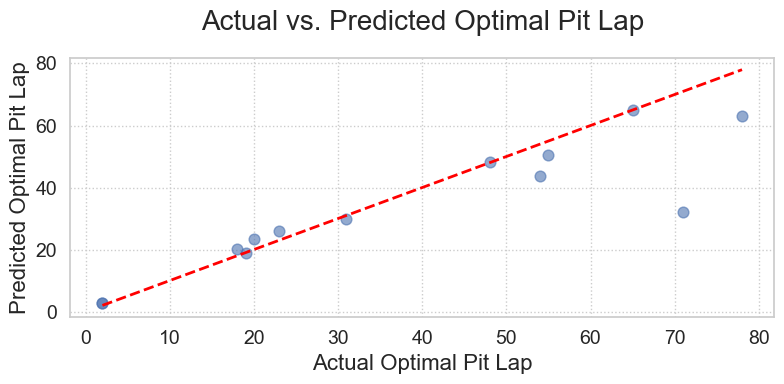

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(y_test, test_preds, s=60, alpha=0.6)

min_val = min(y_test.min(), test_preds.min())
max_val = max(y_test.max(), test_preds.max())
ax.plot([min_val, max_val], [min_val, max_val],linestyle='--', linewidth=2, color ='red')

ax.grid(True, linestyle=':', linewidth=1)
ax.set_xlabel('Actual Optimal Pit Lap', fontsize=16)
ax.set_ylabel('Predicted Optimal Pit Lap', fontsize=16)
ax.set_title('Actual vs. Predicted Optimal Pit Lap', fontsize=20, pad=20)

ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

In [32]:
results = pit_data1.loc[X_test.index, ['Driver', 'Stint', 'OptimalPitLap']].copy()
results['PredictedOptimalPitLap'] = test_preds.round().astype(int)
results.head(10)

,Driver,Stint,OptimalPitLap,PredictedOptimalPitLap
6,RAI,1,18.0,20
51,HAM,3,31.0,30
102,LEC,1,2.0,3
13,VER,1,48.0,48
65,RIC,2,65.0,65
86,PER,3,54.0,44
92,RUS,1,55.0,51
0,ALO,1,20.0,23
44,RIC,2,78.0,63
110,SAI,1,2.0,3


In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor  # or whatever model you're using

model = RandomForestRegressor(random_state=42,max_depth=3,min_samples_leaf=5)

# Use normal KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

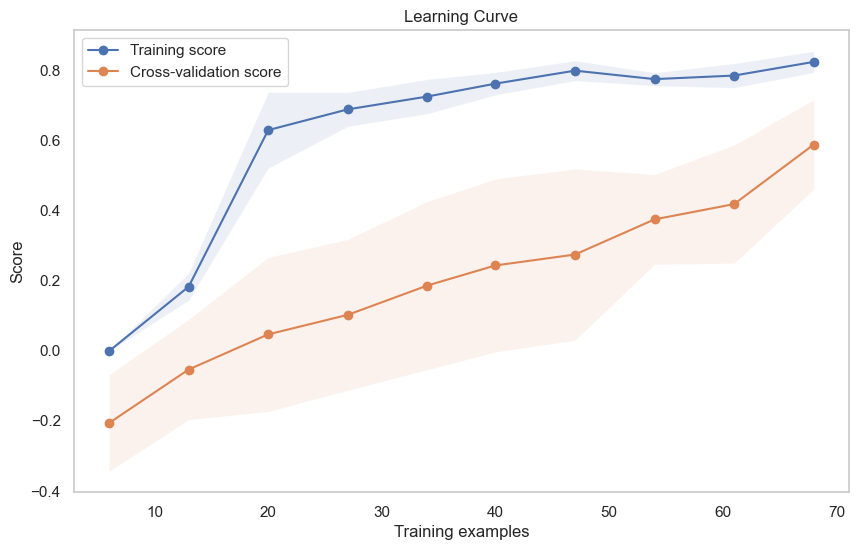

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [ ]:
features = X.columns if isinstance(X, pd.DataFrame) else pit_data1.drop(columns=["Year", "Driver", "OptimalPitLap", "StintEndLap"]).columns

importances = model.feature_importances_ # feature importances
feat_importances = pd.DataFrame({"Feature": features,"Importance": importances})

feat_importances = feat_importances.sort_values(by="Importance", ascending=False).head(10) # Descending order
feat_importances = feat_importances.reset_index(drop=True)

print("Top 10 Important Features:")
feat_importances

Top 10 Important Features:


,Feature,Importance
0,StintLength,0.163011
1,StintLengthSoFar_max,0.112951
2,AirTemp_mean,0.095136
3,LapTime(s)_mean,0.092061
4,PositionDelta_last,0.087613
5,TrackTemp_mean,0.074921
6,TyreLife_max,0.069696
7,TyreLifeRatio,0.069257
8,Humidity_mean,0.069185
9,Rain_sum,0.043841


In [ ]:
!pip install shap

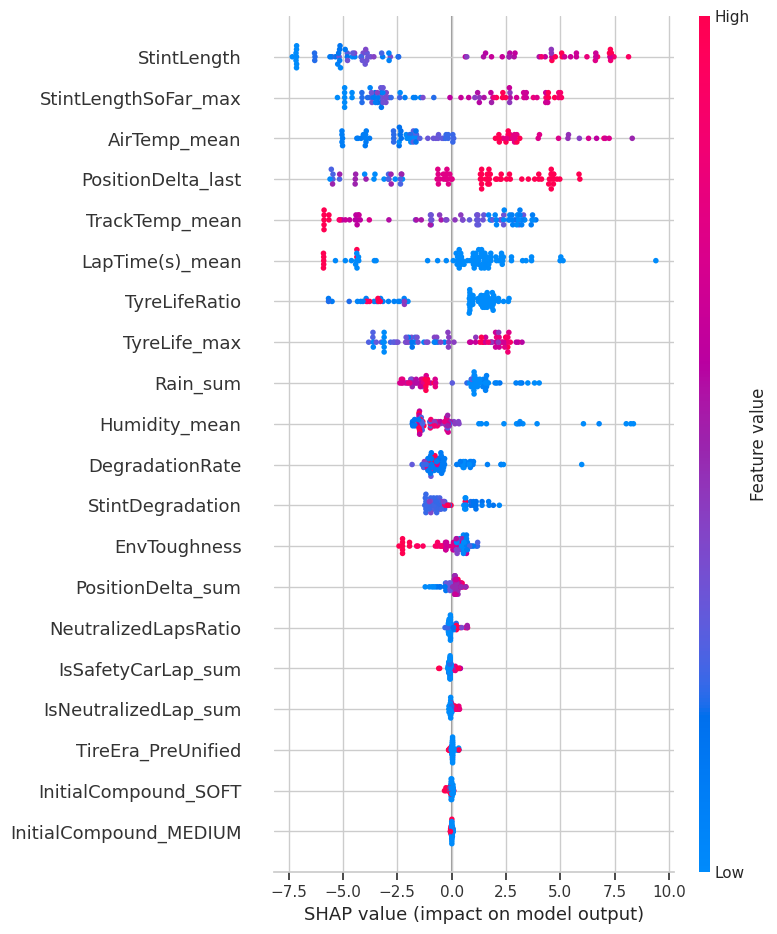

In [ ]:
import shap

# Create SHAP explainer for the trained Random Forest model
explainer = shap.TreeExplainer(model)

# SHAP values for the training set
shap_values = explainer.shap_values(X)

plt.figure(figsize=(6, 5))
shap.summary_plot(shap_values, X, feature_names=X.columns)

### How can we predict whether a pit stop will result in a positional gain within the five laps following the stop?

In [ ]:
import pandas as pd

In [ ]:
pit = pd.read_csv("/content/drive/MyDrive/Pit_Stop7.csv")

pit["LapNumber"] = pit["LapNumber"].astype(int)
pit["Driver"] = pit["Driver"].str.strip()
pit["Year"] = pit["Year"].astype(int)

pit = pit.sort_values(by=["Year", "Driver", "LapNumber"]).reset_index(drop=True)

In [ ]:
results = []
grouped = pit.groupby(["Year", "Driver"])

for (year, driver), group in grouped:
    group = group.reset_index(drop=True)

    # Pit stop detection by Stint change
    pit_laps = group[group["Stint"].diff() == 1].index

    for pit_idx in pit_laps:
        pit_lap = group.loc[pit_idx, "LapNumber"]
        lap_after_5 = pit_lap + 5

        try:
            pos_before = group.loc[pit_idx, "Position"]
            pos_after = group[group["LapNumber"] == lap_after_5]["Position"].values[0]
            delta = pos_before - pos_after
            outcome = "Gain" if delta > 0 else "No Gain"

            results.append({
                "Year": year,
                "Driver": driver,
                "LapNumber": pit_lap,  # match this key
                "PostPitOutcome": outcome
            })
        except IndexError:
            continue

# Create and clean merge keys
post_pit_outcomes = pd.DataFrame(results)
post_pit_outcomes["LapNumber"] = post_pit_outcomes["LapNumber"].astype(int)
post_pit_outcomes["Driver"] = post_pit_outcomes["Driver"].str.strip()
post_pit_outcomes["Year"] = post_pit_outcomes["Year"].astype(int)

# Merge data
pit_data_with_outcomes = pd.merge(pit, post_pit_outcomes, how="left", on=["Year", "Driver", "LapNumber"])

In [ ]:
pit_data_with_outcomes["IsPitLap"] = pit_data_with_outcomes["PostPitOutcome"].notna().astype(int) # Create a new column 'IsPitLap' that marks 1 if the lap is a pit stop, otherwise 0

In [ ]:
pit_data_with_outcomes["PostPitOutcome"] = pit_data_with_outcomes.groupby(["Year", "Driver"])["PostPitOutcome"].ffill(limit=5)

In [ ]:
pit_data_with_outcomes["TargetLapWindow"] = 0

# For each pit stop, flag the current lap and the next 5 laps as part of the "post-pit stop window"
for _, row in post_pit_outcomes.iterrows():
    condition = (
        (pit_data_with_outcomes["Year"] == row["Year"]) &
        (pit_data_with_outcomes["Driver"] == row["Driver"]) &
        (pit_data_with_outcomes["LapNumber"] >= row["LapNumber"]) &
        (pit_data_with_outcomes["LapNumber"] <= row["LapNumber"] + 5)
    )
    pit_data_with_outcomes.loc[condition, "TargetLapWindow"] = 1

# We are marking the laps that are immediately influenced by the pit stop.

# This helps your model know which laps belong to the outcome window you're trying to predict.

In [ ]:
pit_data_with_outcomes.head(5)

,Year,Team,Driver,LapNumber,Stint,Compound,TyreLife,StintLengthSoFar,LapTime(s),LapTimeDelta,...,Humidity,Rain,IsSafetyCarLap,IsVSCLap,IsNeutralizedLap,CompoundSimplified,TireEra,PostPitOutcome,IsPitLap,TargetLapWindow
0,2018,McLaren,ALO,1,1,HYPERSOFT,5,1,88.656,0.000,...,51.7,0,0,0,0,SOFT,PreUnified,NaN,0,0
1,2018,McLaren,ALO,2,1,HYPERSOFT,6,2,79.987,-8.669,...,51.4,0,0,0,0,SOFT,PreUnified,NaN,0,0
2,2018,McLaren,ALO,3,1,HYPERSOFT,7,3,79.790,-0.197,...,50.6,1,0,0,0,SOFT,PreUnified,NaN,0,0
3,2018,McLaren,ALO,4,1,HYPERSOFT,8,4,79.456,-0.334,...,50.7,1,0,0,0,SOFT,PreUnified,NaN,0,0
4,2018,McLaren,ALO,5,1,HYPERSOFT,9,5,79.135,-0.321,...,50.0,1,0,0,0,SOFT,PreUnified,NaN,0,0


In [ ]:
# Filter relevant data
pit_data_model = pit_data_with_outcomes[
    (pit_data_with_outcomes["TargetLapWindow"] == 1) &
    (pit_data_with_outcomes["PostPitOutcome"].notna())].copy()

# Encode target
pit_data_model["PostPitEncoded"] = pit_data_model["PostPitOutcome"].map({"Gain": 1, "No Gain": 0})

In [ ]:
drop_cols = ["Year", "Team", "Driver", "Compound", "CompoundSimplified", "TireEra","PostPitOutcome", "PostPitEncoded", "IsPitLap", "TargetLapWindow"]

X = pit_data_model.drop(columns=drop_cols) # Predictors
y = pit_data_model["PostPitEncoded"] # Traget

**MODEL 1 : Logisitc Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

seed = 42

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train model
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        56
           1       0.71      0.52      0.60        23

    accuracy                           0.80        79
   macro avg       0.76      0.72      0.73        79
weighted avg       0.79      0.80      0.79        79



**HYPERPARAMETER TUNING - Model 1**

To further improve model performance in predicting whether a pit stop would lead to a positional gain, we apply hyperparameter tuning using GridSearchCV.

In [ ]:
# Define param grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga'],  # Both support L1 and L2
    'logreg__class_weight': ['balanced']}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000,random_state=seed))])

# GridSearchCV
grid = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__class_weight': ['balanced'],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga']},
             scoring='f1_macro', verbose=1)

In [ ]:
# Evaluation

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
print("\n Classification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred))

Best Parameters: {'logreg__C': 1, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

 Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        56
           1       0.68      0.74      0.71        23

    accuracy                           0.82        79
   macro avg       0.78      0.80      0.79        79
weighted avg       0.83      0.82      0.82        79



**MODEL 2 : Support Vector Machine Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

In [ ]:
# Train the model

svm_pipeline = Pipeline([('scaler', StandardScaler()),
 ('svm', SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', probability=True,random_state=seed))])

svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=10, class_weight='balanced', probability=True,
                     random_state=42))])

In [ ]:
# Predict
y_pred = svm_pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        56
           1       0.83      0.87      0.85        23

    accuracy                           0.91        79
   macro avg       0.89      0.90      0.89        79
weighted avg       0.91      0.91      0.91        79



In [ ]:
# check for overall performance and overfitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1 = cross_val_score(svm_pipeline, X, y, cv=cv, scoring='f1_macro')
print(f"Stratified CV F1 Macro: {cv_f1.mean():.4f}")

Stratified CV F1 Macro: 0.9012


**HYPERPARAMETER TUNING - Model 2**

To further improve this model's performance in predicting whether a pit stop would lead to a positional gain, we apply hyperparameter tuning using GridSearchCV here as well.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svm__C': [0.1, 1, 10],'svm__gamma': ['scale', 0.1, 1, 10]}

grid = GridSearchCV(svm_pipeline, param_grid, scoring='f1_macro', cv=5)
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(C=10, class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 0.1, 1, 10]},
             scoring='f1_macro')

In [ ]:
# Evaluation
print("Best params:", grid.best_params_)

# Predict and Evaluate
best_svm_pipeline = Pipeline([('scaler', StandardScaler()),('svm', SVC(kernel='rbf', C=10, gamma=0.1, class_weight='balanced', probability=True))])

best_svm_pipeline.fit(X_train, y_train)
y_pred = best_svm_pipeline.predict(X_test)

print("\n Classification Report (Tuned SVM):")
print(classification_report(y_test, y_pred))

Best params: {'svm__C': 10, 'svm__gamma': 0.1}

 Classification Report (Tuned SVM):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        56
           1       0.87      0.87      0.87        23

    accuracy                           0.92        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.92      0.92      0.92        79



In [ ]:
# Check for overfitting and overall performance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1 = cross_val_score(best_svm_pipeline, X, y, cv=cv, scoring='f1_macro')
print(f"Stratified CV F1 Macro: {cv_f1.mean():.4f}")

Stratified CV F1 Macro: 0.9158
